In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
df_standardised = pd.read_csv('../gait_standardised.csv')
df_standardised.head()

,subject,condition,replication,leg,joint,time,angle,angle_scaled
0,1,1,1,1,1,0,4.682881,-0.465902
1,1,1,1,1,1,1,5.073127,-0.441551
2,1,1,1,1,1,2,5.229774,-0.431776
3,1,1,1,1,1,3,5.083273,-0.440918
4,1,1,1,1,1,4,4.652399,-0.467804


In [3]:
print(f"Data types before:\n{df_standardised.dtypes}\n")
categorical_columns = ['subject', 'condition', 'replication', 'leg', 'joint', 'time']
df_standardised[categorical_columns] = df_standardised[categorical_columns].astype('category')
df_standardised['time'] = df_standardised['time'].cat.set_categories(list(range(0, 101)), ordered=True)
print(f"Data types after:\n{df_standardised.dtypes}")

Data types before:
subject           int64
condition         int64
replication       int64
leg               int64
joint             int64
time              int64
angle           float64
angle_scaled    float64
dtype: object

Data types after:
subject         category
condition       category
replication     category
leg             category
joint           category
time            category
angle            float64
angle_scaled     float64
dtype: object


In [4]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
kf.get_n_splits(df_standardised)

10

In [5]:
def calculate_score(model, X, y):
    y_pred = model.predict(X)
    return mean_squared_error(y, y_pred)

scores = []

In [5]:
for i, (train_index, test_index) in enumerate(kf.split(df_standardised)):
    print(f"Fold {i}:")
     
    X_Train = df_standardised.loc[train_index, ['subject','condition','replication','leg','joint']]
    Y_Train = df_standardised.loc[train_index, 'angle_scaled']

    X_Test = df_standardised.loc[test_index, ['subject','condition','replication','leg','joint']]
    Y_Test = df_standardised.loc[test_index, 'angle_scaled']
    
    model = SVR()
    model.fit(X_Train, Y_Train)
    
    score = calculate_score(model, X_Test, Y_Test)
    scores.append(score)
    
    print(f"Score: {score}")

Fold 0:
Score: 0.8543785879018764
Fold 1:
Score: 0.8158615459726327
Fold 2:
Score: 0.833867671101223
Fold 3:
Score: 0.8278822160918018
Fold 4:
Score: 0.8425266132210514
Fold 5:
Score: 0.8398184679813329
Fold 6:
Score: 0.8172948355807405
Fold 7:
Score: 0.8342250704082199
Fold 8:
Score: 0.8345599773341172
Fold 9:
Score: 0.8243600049205635


In [6]:
df_scores = pd.DataFrame({'Fold': range(1, len(scores)+1), 'Score': scores})

print(df_scores)

   Fold     Score
0     1  0.854379
1     2  0.815862
2     3  0.833868
3     4  0.827882
4     5  0.842527
5     6  0.839818
6     7  0.817295
7     8  0.834225
8     9  0.834560
9    10  0.824360


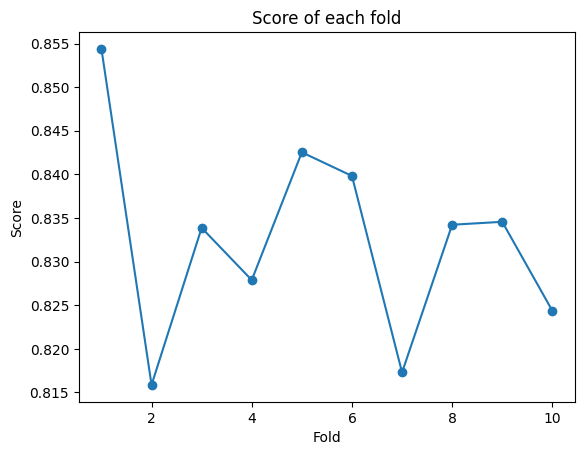

In [7]:
plt.plot(df_scores['Fold'], df_scores['Score'], marker='o')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Score of each fold')
plt.show()